 1) Extract reviews of any product from ecommerce website like amazon.
 2) Perform emotion mining

In [1]:
pip install beautifulsoup4

In [12]:
import numpy as np
import pandas as pd
import string
import spacy
import nltk
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud

**Web Scraping**

In [4]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.amazon.in/255-Bluetooth-Wireless-Earphone-Immersive/product-reviews/B07C2VJFDW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')
reviews = soup.find_all("div",{"data-hook":"review"})                
reviewlist=[]
for item in reviews:
  review={
  'rev'     : item.find('span',{'data-hook':'review-body'}).text.strip(),
  'rating'  : float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars',' ').strip()),
  }
  reviewlist.append(review)
  #print(reviewlist)
df = pd.DataFrame(reviewlist)
df.rename(columns={'rev':'Amazon_Cutomer_Review','rating':'Rating'},inplace=True)
df

,Amazon_Cutomer_Review,Rating
0,"This earphones are unreliable, i bought it be...",1.0
1,No doubt it has a great bass and to a great ex...,3.0
2,"i bought itfor 999,I purchased it second time,...",4.0
3,I'll get straight to the pros and cons of Boat...,4.0
4,"After 11 days, the charging port isn't working...",1.0
5,"Hey Guys,,,,,,, it's Value for money if you ge...",4.0
6,Its Awesome... Good sound quality & 8-9 hrs ba...,5.0
7,Its sound quality is adorable. overall it was ...,1.0
8,After one month usage reviewing this .Pros-1- ...,3.0
9,The product durability is 1 month..I just lost...,1.0


In [6]:
df.drop(labels=['Rating']	, axis=1,inplace=True)
df

,Amazon_Cutomer_Review
0,"This earphones are unreliable, i bought it be..."
1,No doubt it has a great bass and to a great ex...
2,"i bought itfor 999,I purchased it second time,..."
3,I'll get straight to the pros and cons of Boat...
4,"After 11 days, the charging port isn't working..."
5,"Hey Guys,,,,,,, it's Value for money if you ge..."
6,Its Awesome... Good sound quality & 8-9 hrs ba...
7,Its sound quality is adorable. overall it was ...
8,After one month usage reviewing this .Pros-1- ...
9,The product durability is 1 month..I just lost...


In [8]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+","", text) # Remove Mentions
    text = re.sub(r"#","", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+","", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text
# Clean The Text
df["Amazon_Cutomer_Review"] = df["Amazon_Cutomer_Review"].apply(cleantext)
df

,Amazon_Cutomer_Review
0,"This earphones are unreliable, i bought it be..."
1,No doubt it has a great bass and to a great ex...
2,"i bought itfor 999,I purchased it second time,..."
3,I'll get straight to the pros and cons of Boat...
4,"After 11 days, the charging port isn't working..."
5,"Hey Guys,,,,,,, it's Value for money if you ge..."
6,Its Awesome... Good sound quality & 8-9 hrs ba...
7,Its sound quality is adorable. overall it was ...
8,After one month usage reviewing this .Pros-1- ...
9,The product durability is 1 month..I just lost...


In [9]:
# Calculating subjectivity and Polarity
# Function for subjectivity
from textblob import TextBlob
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# Function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

df_1 = df
df_1['Subjectivity'] = df_1.Amazon_Cutomer_Review.apply(calc_subj)
df_1['Polarity'] = df_1.Amazon_Cutomer_Review.apply(calc_pola)

df_1

,Amazon_Cutomer_Review,Subjectivity,Polarity
0,"This earphones are unreliable, i bought it be...",0.519388,0.269388
1,No doubt it has a great bass and to a great ex...,0.496667,0.023077
2,"i bought itfor 999,I purchased it second time,...",0.476190,0.150000
3,I'll get straight to the pros and cons of Boat...,0.404548,0.115961
4,"After 11 days, the charging port isn't working...",0.727273,0.068182
5,"Hey Guys,,,,,,, it's Value for money if you ge...",0.524263,0.150652
6,Its Awesome... Good sound quality & 8-9 hrs ba...,0.691111,0.195000
7,Its sound quality is adorable. overall it was ...,0.500000,0.400000
8,After one month usage reviewing this .Pros-1- ...,0.688889,-0.136667
9,The product durability is 1 month..I just lost...,0.533333,-0.300000


In [10]:
#Classifing these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df_1['Sentiment'] = df_1.Polarity.apply(sentiment)
df_1

,Amazon_Cutomer_Review,Subjectivity,Polarity,Sentiment
0,"This earphones are unreliable, i bought it be...",0.519388,0.269388,Positive
1,No doubt it has a great bass and to a great ex...,0.496667,0.023077,Positive
2,"i bought itfor 999,I purchased it second time,...",0.476190,0.150000,Positive
3,I'll get straight to the pros and cons of Boat...,0.404548,0.115961,Positive
4,"After 11 days, the charging port isn't working...",0.727273,0.068182,Positive
5,"Hey Guys,,,,,,, it's Value for money if you ge...",0.524263,0.150652,Positive
6,Its Awesome... Good sound quality & 8-9 hrs ba...,0.691111,0.195000,Positive
7,Its sound quality is adorable. overall it was ...,0.500000,0.400000,Positive
8,After one month usage reviewing this .Pros-1- ...,0.688889,-0.136667,Negative
9,The product durability is 1 month..I just lost...,0.533333,-0.300000,Negative


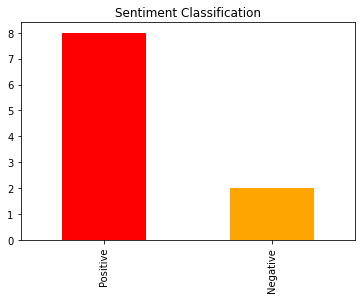

Positive    8
Negative    2
Name: Sentiment, dtype: int64


In [13]:
# see how many ratio of sentiment
colorsss=['red','orange','green']
df_1.Sentiment.value_counts().plot(kind='bar', color=colorsss)
plt.title('Sentiment Classification')
plt.show()
print(df_1.Sentiment.value_counts())

In [21]:
df = [x.strip() for x in df['Amazon_Cutomer_Review']]     # Removing all space at the beginning and at the end of the string
df = [x for x in df if x]                            # Removing empty string because it consider as false in python
df

['This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.',
 'No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.',
 'i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect 

In [23]:
df=' '.join(df)
df

"This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks. No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice. i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop an

In [25]:
# Remove Punctuations 
no_punc_df=df.translate(str.maketrans('','',string.punctuation))
no_punc_df

'This  earphones are unreliable i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts and sound quality is also not that much good but ok one more thing bass is not good as it is a boat earphonesGuysAlso for the proof i have attached picsPlease see and think before buying\u200b this unreliable productThanks No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust1Bluetooth range not more than 10m2 Pain in ear due the conical budscan be removed3 Wires are a bit long which makes it odd in front4 No pouch provided5 Worst part is very low quality and distoring mic Other person keeps complaining about my voice i bought itfor 999I purchased it second time gifted first one to brother This is really goodSound quality is really goodYou can connect 2 devices at a timeI connect laptop and mobile bothwhen listeni

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
#Tokenization
from nltk.tokenize import word_tokenize
df_tokens=word_tokenize(no_punc_df)
print(df_tokens)
print(len(df_tokens))

['This', 'earphones', 'are', 'unreliable', 'i', 'bought', 'it', 'before', '15', 'days', 'meanwhile', 'right', 'side', 'ear', 'buds', 'got', 'cracked', 'automatically', 'and', 'it', 'got', 'divided', 'in', 'two', 'parts', 'and', 'sound', 'quality', 'is', 'also', 'not', 'that', 'much', 'good', 'but', 'ok', 'one', 'more', 'thing', 'bass', 'is', 'not', 'good', 'as', 'it', 'is', 'a', 'boat', 'earphonesGuysAlso', 'for', 'the', 'proof', 'i', 'have', 'attached', 'picsPlease', 'see', 'and', 'think', 'before', 'buying\u200b', 'this', 'unreliable', 'productThanks', 'No', 'doubt', 'it', 'has', 'a', 'great', 'bass', 'and', 'to', 'a', 'great', 'extent', 'noise', 'cancellation', 'and', 'decent', 'sound', 'clarity', 'and', 'mindblowing', 'battery', 'but', 'the', 'following', 'dissapointed', 'me', 'though', 'i', 'tried', 'a', 'lot', 'to', 'adjust1Bluetooth', 'range', 'not', 'more', 'than', '10m2', 'Pain', 'in', 'ear', 'due', 'the', 'conical', 'budscan', 'be', 'removed3', 'Wires', 'are', 'a', 'bit', 'lo

In [32]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
stp_word = pd.read_csv('stop.txt',sep ='\t')

no_stop_tokens = [word for word in df_tokens if not word in stp_word]
print(no_stop_tokens)

['This', 'earphones', 'are', 'unreliable', 'i', 'bought', 'it', 'before', '15', 'days', 'meanwhile', 'right', 'side', 'ear', 'buds', 'got', 'cracked', 'automatically', 'and', 'it', 'got', 'divided', 'in', 'two', 'parts', 'and', 'sound', 'quality', 'is', 'also', 'not', 'that', 'much', 'good', 'but', 'ok', 'one', 'more', 'thing', 'bass', 'is', 'not', 'good', 'as', 'it', 'is', 'boat', 'earphonesGuysAlso', 'for', 'the', 'proof', 'i', 'have', 'attached', 'picsPlease', 'see', 'and', 'think', 'before', 'buying\u200b', 'this', 'unreliable', 'productThanks', 'No', 'doubt', 'it', 'has', 'great', 'bass', 'and', 'to', 'great', 'extent', 'noise', 'cancellation', 'and', 'decent', 'sound', 'clarity', 'and', 'mindblowing', 'battery', 'but', 'the', 'following', 'dissapointed', 'me', 'though', 'i', 'tried', 'lot', 'to', 'adjust1Bluetooth', 'range', 'not', 'more', 'than', '10m2', 'Pain', 'in', 'ear', 'due', 'the', 'conical', 'budscan', 'be', 'removed3', 'Wires', 'are', 'bit', 'long', 'which', 'makes', 'i

In [33]:
doc=(' '.join(no_stop_tokens))
print(doc)

This earphones are unreliable i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts and sound quality is also not that much good but ok one more thing bass is not good as it is boat earphonesGuysAlso for the proof i have attached picsPlease see and think before buying​ this unreliable productThanks No doubt it has great bass and to great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried lot to adjust1Bluetooth range not more than 10m2 Pain in ear due the conical budscan be removed3 Wires are bit long which makes it odd in front4 No pouch provided5 Worst part is very low quality and distoring mic Other person keeps complaining about my voice i bought itfor 999I purchased it second time gifted first one to brother This is really goodSound quality is really goodYou can connect 2 devices at timeI connect laptop and mobile bothwhen listening muaic on Lappy i

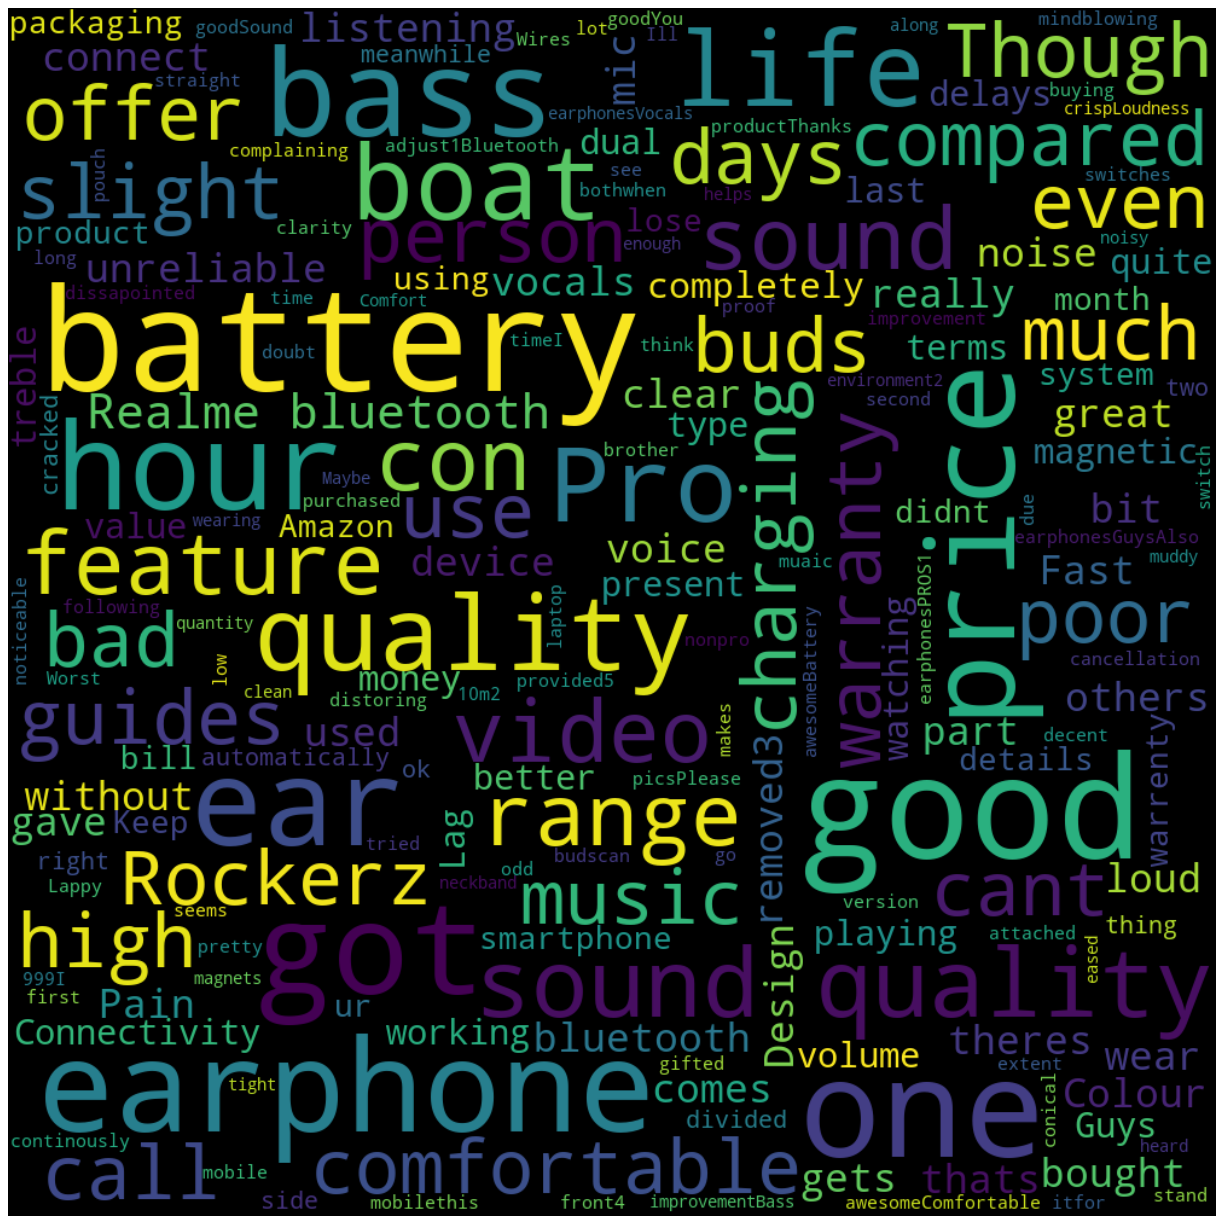

In [34]:
from wordcloud import WordCloud
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(doc)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()